In [44]:
import numpy as np  
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import IPython.display as ipd

In [47]:
voice_path = '/home/s/Ai/nltk_s/data/voice/'

easy = '쉬운데.wav'
hard = '힘들어.wav'

In [48]:
voice_easy, sr = librosa.load(os.path.join(voice_path, easy))
voice_hard, _ = librosa.load(os.path.join(voice_path, hard))
# 위 sample rate와 같은 주파수영역 사용하기 위해 "_" 사용

In [49]:
#음원 >> time domain을 축으로 그리는 함수
def draw_wave(sample_sounds, sample_rate):
    plt.figure(figsize=(12,6))
    librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)
    plt.xlabel("Time (sec)"); plt.ylabel("Amplitude")
    plt.title("Waveform"); plt.show()

In [50]:
ipd.Audio(os.path.join(voice_path, easy))


/tmp/ipykernel_79785/3569226857.py:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)
/home/s/venv/tensorflow/lib/python3.8/site-packages/librosa/display.py:551: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.canvas.draw_idle()
/home/s/venv/tensorflow/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


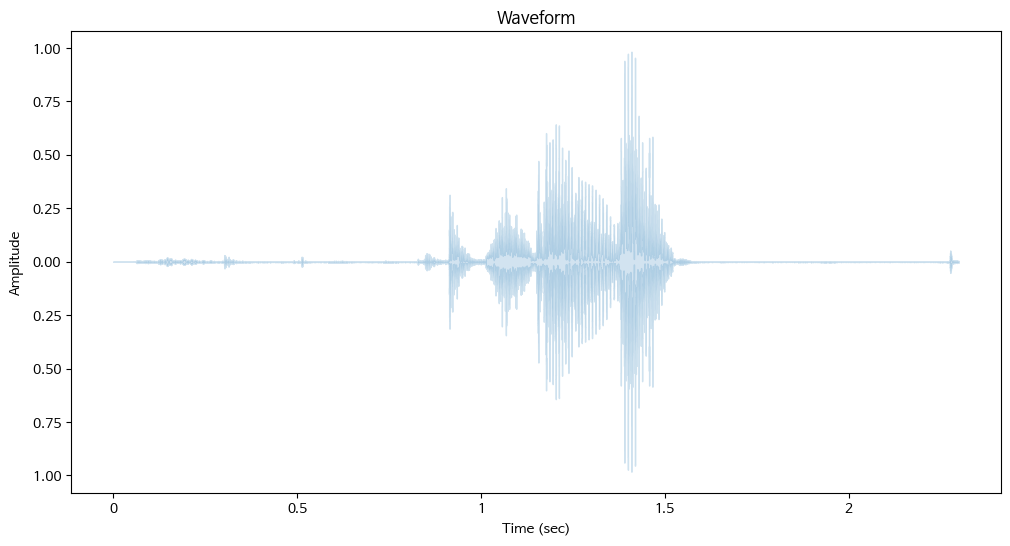

In [51]:
draw_wave(voice_easy, sr)

In [52]:
ipd.Audio(os.path.join(voice_path, hard))

/tmp/ipykernel_79785/3569226857.py:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)


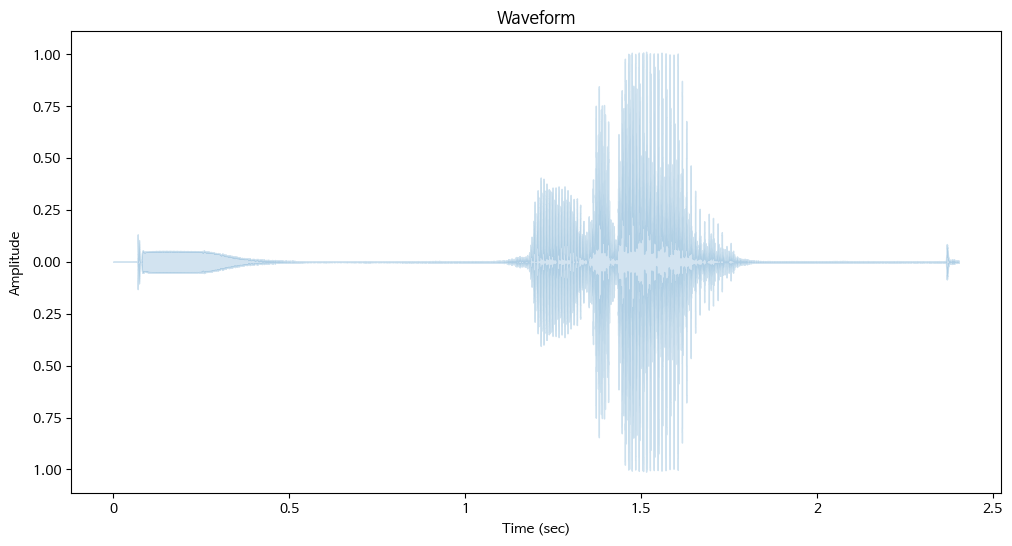

In [53]:
draw_wave(voice_hard, sr)

easy1, sr = librosa.load(os.path.join(voice_path, easy))
hard1, _ = librosa.load(os.path.join(voice_path, hard))

In [54]:
voice_easy.shape

(50688,)

In [55]:
voice_easy_ft = np.fft.fft(voice_easy)
voice_easy_ft.shape

(50688,)

In [56]:
voice_easy_ft[0] #복소수가 있음을 확인

(0.6709841275911298+0j)

In [57]:
magnitude_voice_easy = np.abs(voice_easy_ft) #절댓값 씌워서 복소수 제거

In [58]:
magnitude_voice_easy[0] #복소수 제거된 실제 magnitude

0.6709841275911298

In [59]:
# def plot_magnitude_spectrum(sample_sounds, title, sr):
#     ft = np.fft.fft(sample_sounds)
#     magnitude = np.abs(ft)
#     frequency = np.linspace(0, sr, len(magnitude))
    
#     # FFT변환한 결과로 나온 specturm은 대칭구조의 모습을 보인다.
#     # high frequency 부분 반절을 잘라내고 앞쪽 반절만 사용.
#     left_frequency = frequency[:int(len(frequency)/2)]
#     left_magnitude = magnitude[:int(len(magnitude)/2)]

#     plt.figure(figsize=(15, 5))
#     plt.plot(left_frequency, left_magnitude)
#     plt.title(title)
#     plt.xlabel('frequency (Hz)')
#     plt.ylabel('magnitude')
    
#     plt.show()

In [60]:
# plot_magnitude_spectrum(easy1, "voice_easy", sr)


In [61]:
# FFT결과를 그리는 함수
def plot_magnitude_spectrum(sample_sounds, title, sr, freq_ratio=1):
    ft = np.fft.fft(sample_sounds)
    magnitude = np.abs(ft)
    frequency = np.linspace(0, sr, len(magnitude))
    
    
    frequency_bin = int(len(frequency) * freq_ratio)
    # FFT변환한 결과로 나온 spectrum은 대칭구조의 모습을 보인다.
    # freq_ration값을 곱해서 원하는 배수만큼 자를 수 있다.
    # frequency_bin :주파수 해상도
    
    plt.figure(figsize=(15, 5))
    plt.plot(frequency[:frequency_bin], magnitude[:frequency_bin])
    plt.title(title)
    plt.xlabel('frequency (Hz)')
    plt.ylabel('magnitude')
    
    plt.show()

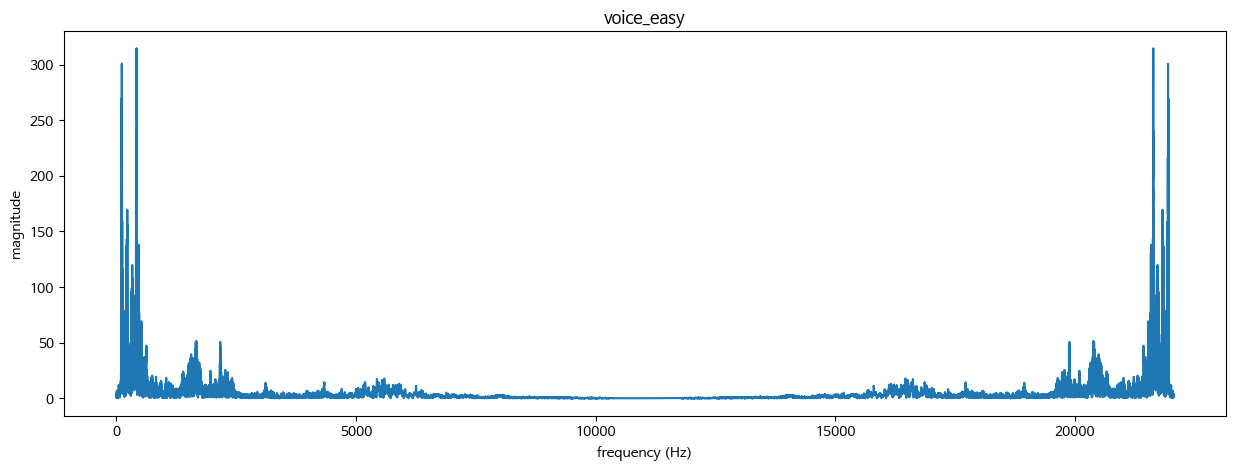

In [62]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 1)
# 22,050Hz가 default 

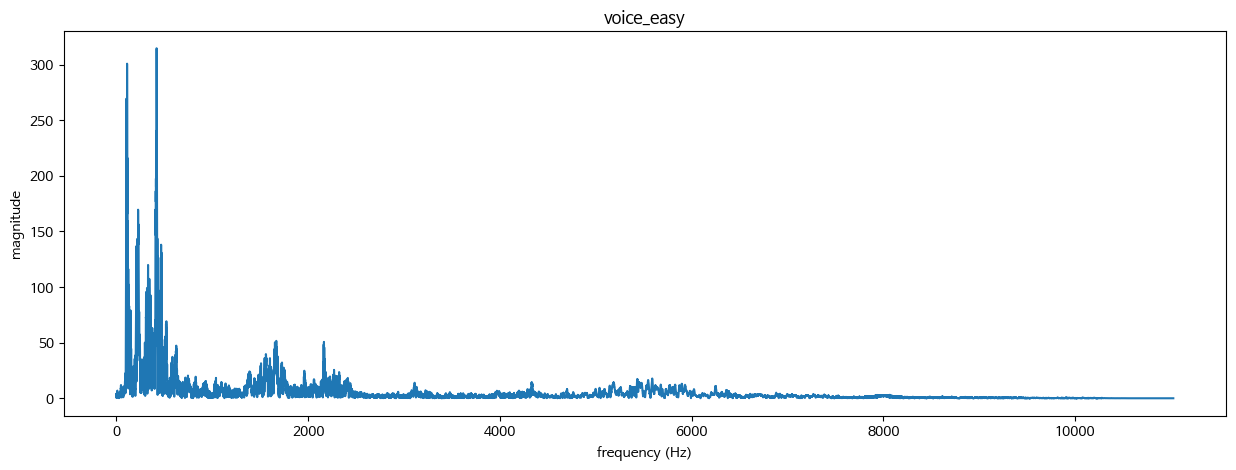

In [63]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 0.5)
# 0.5값을 줘서 대칭되는 것 중 전면부만 사용

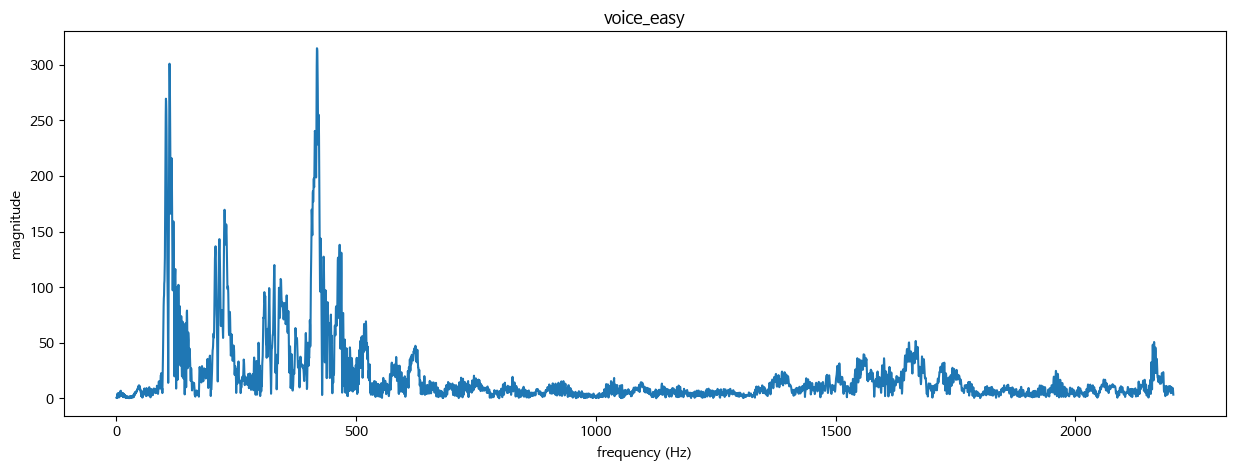

In [64]:
plot_magnitude_spectrum(voice_easy, "voice_easy", sr, 0.1)
#유효한 스펙트럼까지 슬라이싱

In [65]:
# #librosa가 제공하는 STFT 결과 얻어오는 함수
# def get_stft(sample_sounds):
#     return librosa.stft(sample_sounds)
# #stft한 결과를 그리는 함수
# def draw_stft(sample_sounds, ylim=(None, None)):
#     plt.figure(figsize=(12,6))
#     librosa.display.specshow(np.abs(get_stft(sample_sounds)),
#                              y_axis='hz', x_axis='s')
#     plt.ylim(ylim); plt.grid(); plt.show()

In [66]:
# #STFT를 통해 생성된 matrix
# S = np.abs(librosa.stft(voice_easy))
# S

In [67]:
#mel filter bank
melfb = librosa.filters.mel(sr=16000, n_fft=2048, fmax=8000)
melfb


array([[-0.        ,  0.01428889,  0.02857778, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.00043527,
         0.00021763,  0.        ]], dtype=float32)

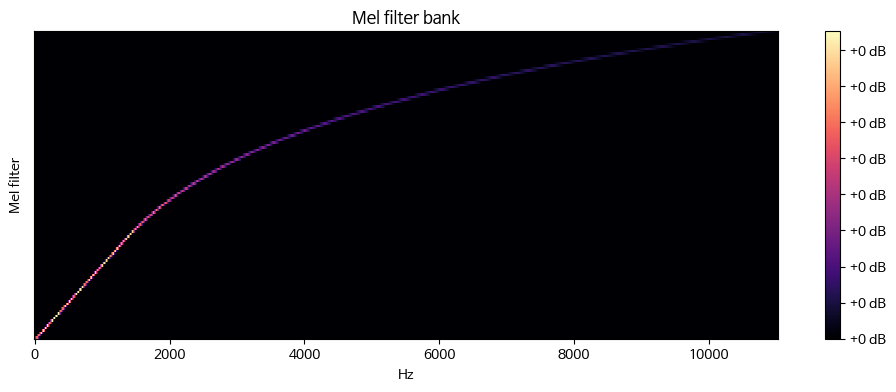

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
librosa.display.specshow(melfb, x_axis='linear')
plt.ylabel('Mel filter')
plt.title('Mel filter bank')
plt.colorbar(format='%+02.0f dB')

/tmp/ipykernel_79785/338176079.py:1: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00163173 -0.00141811
 -0.00139962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(voice_easy, sr=sr, n_mels=128, fmax=8000)


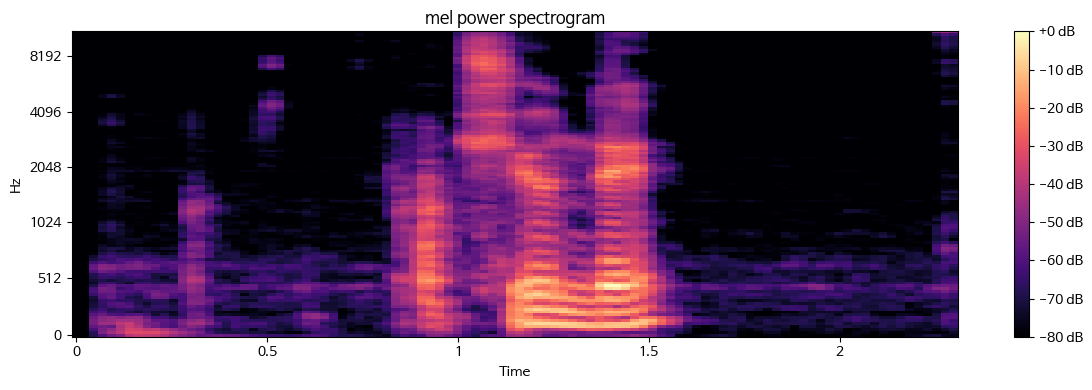

In [69]:
S = librosa.feature.melspectrogram(voice_easy, sr=sr, n_mels=128, fmax=8000) 
 
S_dB= librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12, 4))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+02.0f dB')
plt.title('mel power spectrogram')
plt.tight_layout()
plt.show()

In [70]:
#sacling
min_level_db = -100
 
def normalize(S):
    return np.clip((S - min_level_db) / -min_level_db, 0, 1)

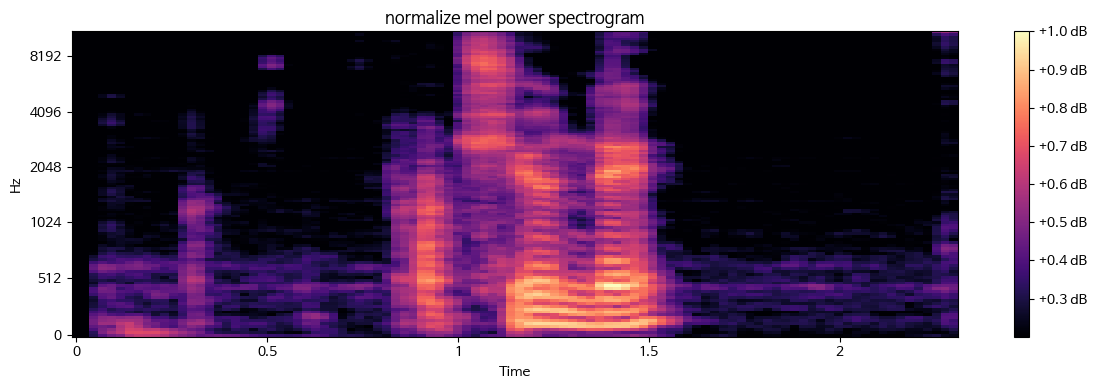

In [71]:
normalize_S = normalize(S_dB)
 
plt.figure(figsize=(12, 4))
librosa.display.specshow(normalize_S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+0.1f dB')
plt.title('normalize mel power spectrogram')
plt.tight_layout()
plt.show()

### normalize mel_spectogram 저장해주는 코드

In [214]:
for (root, directories, files) in os.walk(voice_path):
    for d in directories:
        d_path = os.path.join(root, d)
        

    for file in files:
        file_path = os.path.join(root, file)
        print(file_path)

/home/s/Ai/nltk_s/data/voice/안좋아요_5.wav
/home/s/Ai/nltk_s/data/voice/하기싫다_6.wav
/home/s/Ai/nltk_s/data/voice/아_13.wav
/home/s/Ai/nltk_s/data/voice/좋아요_4.wav
/home/s/Ai/nltk_s/data/voice/안좋아요_23.wav
/home/s/Ai/nltk_s/data/voice/아_3.wav
/home/s/Ai/nltk_s/data/voice/안좋아요_15.wav
/home/s/Ai/nltk_s/data/voice/하기싫다_3.wav
/home/s/Ai/nltk_s/data/voice/하기싫다_8.wav
/home/s/Ai/nltk_s/data/voice/하기싫다_14.wav
/home/s/Ai/nltk_s/data/voice/피곤해_1.wav
/home/s/Ai/nltk_s/data/voice/피곤해_15.wav
/home/s/Ai/nltk_s/data/voice/피곤해_8.wav
/home/s/Ai/nltk_s/data/voice/좋아_13.wav
/home/s/Ai/nltk_s/data/voice/안좋아요_9.wav
/home/s/Ai/nltk_s/data/voice/안좋아요_14.wav
/home/s/Ai/nltk_s/data/voice/좋아_11.wav
/home/s/Ai/nltk_s/data/voice/하기싫다_4.wav
/home/s/Ai/nltk_s/data/voice/별로야_11.wav
/home/s/Ai/nltk_s/data/voice/좋아_19.wav
/home/s/Ai/nltk_s/data/voice/별로야_7.wav
/home/s/Ai/nltk_s/data/voice/좋아요_25.wav
/home/s/Ai/nltk_s/data/voice/아_16.wav
/home/s/Ai/nltk_s/data/voice/아_24.wav
/home/s/Ai/nltk_s/data/voice/좋아_16.wav
/home/s/Ai/nl

<ipython-input-1-ebef3f455010>:16: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
<ipython-input-1-ebef3f455010>:40: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01274624 -0.0130742
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000)
<ipython-input-1-ebef3f455010>:40: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00670409 -0.00955241
  0.        ] a

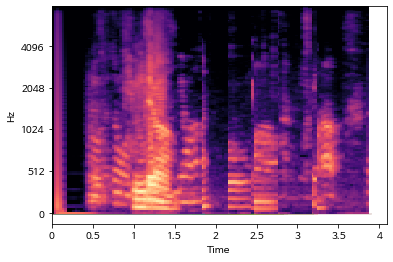

In [1]:
import numpy as np
import matplotlib as mpl  
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
import IPython.display as ipd
import hgtk # https://github.com/bluedisk/hangul-toolkit
mpl.rc('font', family="NanumBarunGothic")

#path = '/home/s/Ai/nltk_s/data/plot/'

#음원 >> time domain을 축으로 그리는 함수
def draw_wave(sample_sounds, sample_rate):
    #plt.figure(figsize=(12,6))
    librosa.display.waveshow(sample_sounds, sample_rate, alpha=0.2)
    #plt.xlabel("Time (sec)"); plt.ylabel("Amplitude")
    #plt.title("Waveform__" + file_path.split('/')[7].split('.')[0]); #plt.show(); 
    

#FFT결과를 그리는 함수
def plot_magnitude_spectrum(sample_sounds, sr, freq_ratio=1):
    ft = np.fft.fft(sample_sounds)
    magnitude = np.abs(ft)
    frequency = np.linspace(0, sr, len(magnitude))
    frequency_bin = int(len(frequency) * freq_ratio)
    # FFT변환한 결과로 나온 spectrum은 대칭구조의 모습을 보인다.
    # freq_ration값을 곱해서 원하는 배수만큼 자를 수 있다.
    # frequency_bin :주파수 해상도
    # plt.figure(figsize=(15, 5))
    # plt.plot(frequency[:frequency_bin], magnitude[:frequency_bin])
    # plt.title('FFT__' + file_path.split('/')[7].split('.')[0])
    # plt.xlabel('frequency (Hz)')
    # plt.ylabel('magnitude')
    # plt.show()
   

#scaling한 mel_spectogram 그리는 함수
def plot_nomalize_mel_spectrogram(sample_sounds, sr):
    S = librosa.feature.melspectrogram(sample_sounds, sr=sr, n_mels=128, fmax=8000) 
    S_dB= librosa.power_to_db(S, ref=np.max)
    min_level_db = -100
    normalize_spectro =  np.clip((S_dB - min_level_db) / -min_level_db, 0, 1)
    #plt.figure(figsize=(12, 4))
    librosa.display.specshow(normalize_spectro, sr=sr, x_axis='time', y_axis='mel')
    #plt.colorbar(format='%+0.1f dB')
    #plt.title('normalize mel power spectrogram__' + file_path.split('/')[7].split('.')[0])
    #plt.tight_layout()
    path = '/home/s/Ai/nltk_s/data/plot/'
    plt.savefig(path + file_path.split('/')[-1].split('.')[0] + '.png')
    #plt.show()
    

def mel_specto_split(jamo_sent, normalize_spectro, time_frame_num, char_frame_num):
    mpl.rc('font', family="NanumBarunGothic")
    mel_freq_num = 140
    plt.figure(figsize=(20, 150))
    jamo_sent_size = len(jamo_sent)
    for i in range(0, jamo_sent_size):
        plt.subplot(jamo_sent_size, 5, i+1)
        start_position = (i * char_frame_num) - 1
        end_position = ((i+1) * char_frame_num) + 1
        if(start_position < 0):
            start_position = 0
            end_position = end_position + 1
        if(end_position > time_frame_num):
            start_position = start_position - (end_position - time_frame_num)
            end_position = time_frame_num
        window = normalize_spectro[0:mel_freq_num, start_position:end_position]
        plt.pcolor(window, cmap='jet')
        plt.title(str(jamo_sent[i]))
        plt.colorbar()



voice_path = '/home/s/Ai/nltk_s/data/voice/'

for (root, directories, files) in os.walk(voice_path):
    for d in directories:
        d_path = os.path.join(root, d)
        

    for file in files:
        file_path = os.path.join(root, file)
        voice, sr = librosa.load(file_path, sr=16000)
        
        draw_wave(voice, sr)
        plot_magnitude_spectrum(voice, sr, 0.1) #유효한 스펙트럼까지 슬라이싱
        plot_nomalize_mel_spectrogram(voice, sr)

        # S = librosa.feature.melspectrogram(voice, sr=sr, n_mels=128, fmax=8000) 
        # S_dB= librosa.power_to_db(S, ref=np.max)
        # min_level_db = -100
        # normalize_spectro =  np.clip((S_dB - min_level_db) / -min_level_db, 0, 1)
        # path = '/home/s/Ai/nltk_s/data/plot/'
        # plt.savefig(path + file_path.split('/')[7].split('.')[0] + '.png')


### 이미지 리사이즈

In [2]:
import os
import glob
from PIL import Image

files = glob.glob('/home/s/Ai/nltk_s/data/plot/*.png')

for f in files:
    img = Image.open(f)
    img_resize = img.resize((int(img.width / 2), int(img.height / 2)))
    title, ext = os.path.splitext(f)
    img_resize.save(title + ext)

### GPU사용

In [2]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

2023-01-18 12:18:03.935508: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-01-18 12:18:03.935650: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ubuntu
2023-01-18 12:18:03.935657: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ubuntu
2023-01-18 12:18:03.935913: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.78.1
2023-01-18 12:18:03.935930: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.78.1
2023-01-18 12:18:03.935936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 525.78.1


### 폴더 확인

In [3]:
!ls /home/s/Ai/nltk_s/data/plot/

하기싫다_10.png  힘들어_15.png	  피곤해_20.png    안좋아요_5.png
안좋아요_10.png  피곤해_15.png	  힘들어_20.png    하기싫다_5.png
힘들어__10.png	 별로야_15.png	  별로야_20.png    힘들어_5.png
좋아요_10.png	 좋아_15.png	  좋아요_20.png    별로야_5.png
피곤해_10.png	 아_15.png	  좋아_20.png	   좋아요_5.png
힘들어_10.png	 하기싫다_16.png  아_20.png	   피곤해_5.png
별로야_10.png	 안좋아요_16.png  안좋아요_21.png  좋아_5.png
좋아_10.png	 별로야_16.png	  좋아요_21.png    아_5.png
아_10.png	 피곤해_16.png	  아_21.png	   굿_5.png
굿_10.png	 힘들어_16.png	  안좋아요_22.png  하기싫다_6.png
안좋아요_11.png  좋아요_16.png	  좋아요_22.png    안좋아요_6.png
하기싫다_11.png  좋아_16.png	  아_22.png	   힘들어_6.png
별로야_11.png	 아_16.png	  안좋아요_23.png  좋아요_6.png
힘들어_11.png	 안좋아요_17.png  좋아요_23.png    피곤해_6.png
피곤해_11.png	 하기싫다_17.png  아_23.png	   별로야_6.png
좋아요_11.png	 힘들어_17.png	  안좋아요_24.png  좋아_6.png
좋아_11.png	 피곤해_17.png	  좋아요_24.png    굿_6.png
아_11.png	 별로야_17.png	  아_24.png	   아_6.png
하기싫다_12.png  좋아요_17.png	  안좋아요_25.png  하기싫다_7.png
안좋아요_12.png  좋아_17.png	  좋아요_25.png    안좋아요_7.png
힘들어_12.png	 아_17.png	  아_25.png	   좋아요_7.png
피곤해

In [4]:
import glob
file_list = glob.glob('/home/s/Ai/nltk_s/data/plot/*')
file_list

['/home/s/Ai/nltk_s/data/plot/별로야_9.png',
 '/home/s/Ai/nltk_s/data/plot/안좋아요_21.png',
 '/home/s/Ai/nltk_s/data/plot/별로야_16.png',
 '/home/s/Ai/nltk_s/data/plot/하기싫다_4.png',
 '/home/s/Ai/nltk_s/data/plot/아_10.png',
 '/home/s/Ai/nltk_s/data/plot/아_2.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_10.png',
 '/home/s/Ai/nltk_s/data/plot/굿_6.png',
 '/home/s/Ai/nltk_s/data/plot/안좋아요_20.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_4.png',
 '/home/s/Ai/nltk_s/data/plot/피곤해_16.png',
 '/home/s/Ai/nltk_s/data/plot/좋아_3.png',
 '/home/s/Ai/nltk_s/data/plot/하기싫다_12.png',
 '/home/s/Ai/nltk_s/data/plot/힘들어_19.png',
 '/home/s/Ai/nltk_s/data/plot/안좋아요_19.png',
 '/home/s/Ai/nltk_s/data/plot/좋아요_1.png',
 '/home/s/Ai/nltk_s/data/plot/좋아_19.png',
 '/home/s/Ai/nltk_s/data/plot/좋아_13.png',
 '/home/s/Ai/nltk_s/data/plot/안좋아요_24.png',
 '/home/s/Ai/nltk_s/data/plot/힘들어_16.png',
 '/home/s/Ai/nltk_s/data/plot/피곤해_3.png',
 '/home/s/Ai/nltk_s/data/plot/아_18.png',
 '/home/s/Ai/nltk_s/data/plot/피곤해_10.png',
 '/home/s/Ai/nltk_s/data

### 라벨만 슬라이싱

In [5]:
label_name = [each.split('/')[-1].split('.')[0].split('_')[0] for each in file_list]
label_name

['별로야',
 '안좋아요',
 '별로야',
 '하기싫다',
 '아',
 '아',
 '좋아요',
 '굿',
 '안좋아요',
 '좋아요',
 '피곤해',
 '좋아',
 '하기싫다',
 '힘들어',
 '안좋아요',
 '좋아요',
 '좋아',
 '좋아',
 '안좋아요',
 '힘들어',
 '피곤해',
 '아',
 '피곤해',
 '피곤해',
 '하기싫다',
 '아',
 '좋아요',
 '아',
 '아',
 '아',
 '힘들어',
 '힘들어',
 '안좋아요',
 '좋아',
 '좋아요',
 '안좋아요',
 '아',
 '하기싫다',
 '안좋아요',
 '피곤해',
 '굿',
 '좋아',
 '좋아',
 '아',
 '하기싫다',
 '좋아요',
 '피곤해',
 '좋아요',
 '하기싫다',
 '굿',
 '안좋아요',
 '별로야',
 '별로야',
 '좋아',
 '굿',
 '좋아요',
 '힘들어',
 '하기싫다',
 '좋아요',
 '안좋아요',
 '좋아요',
 '안좋아요',
 '별로야',
 '별로야',
 '좋아',
 '별로야',
 '안좋아요',
 '굿',
 '피곤해',
 '안좋아요',
 '힘들어',
 '하기싫다',
 '힘들어',
 '아',
 '안좋아요',
 '좋아요',
 '하기싫다',
 '별로야',
 '피곤해',
 '굿',
 '아',
 '힘들어',
 '좋아요',
 '힘들어',
 '하기싫다',
 '좋아',
 '힘들어',
 '좋아',
 '피곤해',
 '아',
 '별로야',
 '힘들어',
 '좋아',
 '안좋아요',
 '하기싫다',
 '굿',
 '피곤해',
 '하기싫다',
 '좋아요',
 '하기싫다',
 '굿',
 '좋아요',
 '좋아요',
 '좋아요',
 '굿',
 '안좋아요',
 '좋아',
 '피곤해',
 '아',
 '좋아요',
 '안좋아요',
 '피곤해',
 '좋아',
 '별로야',
 '피곤해',
 '힘들어',
 '좋아요',
 '좋아',
 '하기싫다',
 '좋아요',
 '하기싫다',
 '피곤해',
 '아',
 '안좋아요',
 '아',
 '별로야',
 '아',
 '아',
 '별로야',
 '

### 갯수 확인

In [6]:
len(file_list), len(label_name)

(180, 180)

### 데이터 프레임 생성

In [7]:
import pandas as pd

file_list_pd = pd.DataFrame({'path':file_list, 'label':label_name})
file_list_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    180 non-null    object
 1   label   180 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


### 라벨 현황

<AxesSubplot: >

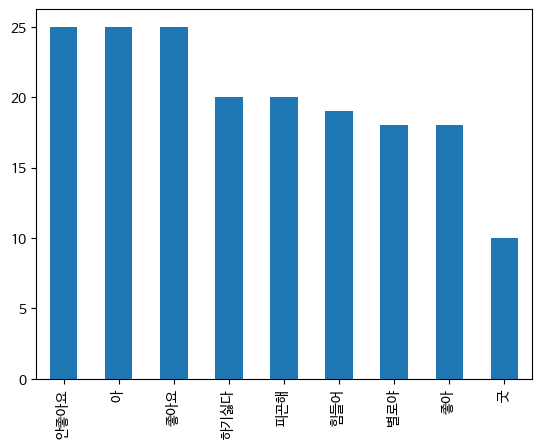

In [8]:
import matplotlib as mpl
mpl.rc('font', family="NanumBarunGothic")

file_list_pd['label'].value_counts().plot.bar()

### 분류를 위해 라벨에서 하나씩

In [9]:
random_sample = file_list_pd.groupby('label', group_keys=False).apply(lambda x: x.sample(1))

random_sample

,path,label
166,/home/s/Ai/nltk_s/data/plot/굿_10.png,굿
2,/home/s/Ai/nltk_s/data/plot/별로야_16.png,별로야
21,/home/s/Ai/nltk_s/data/plot/아_18.png,아
59,/home/s/Ai/nltk_s/data/plot/안좋아요_11.png,안좋아요
33,/home/s/Ai/nltk_s/data/plot/좋아_12.png,좋아
103,/home/s/Ai/nltk_s/data/plot/좋아요_21.png,좋아요
111,/home/s/Ai/nltk_s/data/plot/피곤해_8.png,피곤해
37,/home/s/Ai/nltk_s/data/plot/하기싫다_14.png,하기싫다
115,/home/s/Ai/nltk_s/data/plot/힘들어_13.png,힘들어


### 라벨 갯수확인

In [10]:
random_sample.count()

path     9
label    9
dtype: int64

### 라벨에 매칭해줄 딕셔너리 생성

In [1]:
wav_dict = {'네' : 0,
            '아니요' : 1
            }

In [12]:
# 라벨로 변환
class_label = []
for label in file_list_pd['label']:
    if label in wav_dict:
        class_label.append(wav_dict[label])
file_list_pd['class'] = class_label
file_list_pd

,path,label,class
0,/home/s/Ai/nltk_s/data/plot/별로야_9.png,별로야,7
1,/home/s/Ai/nltk_s/data/plot/안좋아요_21.png,안좋아요,1
2,/home/s/Ai/nltk_s/data/plot/별로야_16.png,별로야,7
3,/home/s/Ai/nltk_s/data/plot/하기싫다_4.png,하기싫다,4
4,/home/s/Ai/nltk_s/data/plot/아_10.png,아,0
...,...,...,...
175,/home/s/Ai/nltk_s/data/plot/하기싫다_18.png,하기싫다,4
176,/home/s/Ai/nltk_s/data/plot/아_13.png,아,0
177,/home/s/Ai/nltk_s/data/plot/힘들어_8.png,힘들어,6
178,/home/s/Ai/nltk_s/data/plot/아_12.png,아,0


### 라벨 하나씩 뽑은걸 그리는 함수

In [13]:
import matplotlib.pyplot as plt

def draw_sample_pic_file_list(df):
    fig = plt.figure(1, figsize = (24, 20))

    cnt = 1
    for idx, row in df.iterrows():
        if cnt > len(df): break
        plt.subplot(6, 6, cnt)
        cnt+=1
        image= plt.imread(row['path'])
        plt.imshow(image)
        plt.axis('off')
        plt.title(row['label'])
        
    plt.tight_layout()
    plt.show()

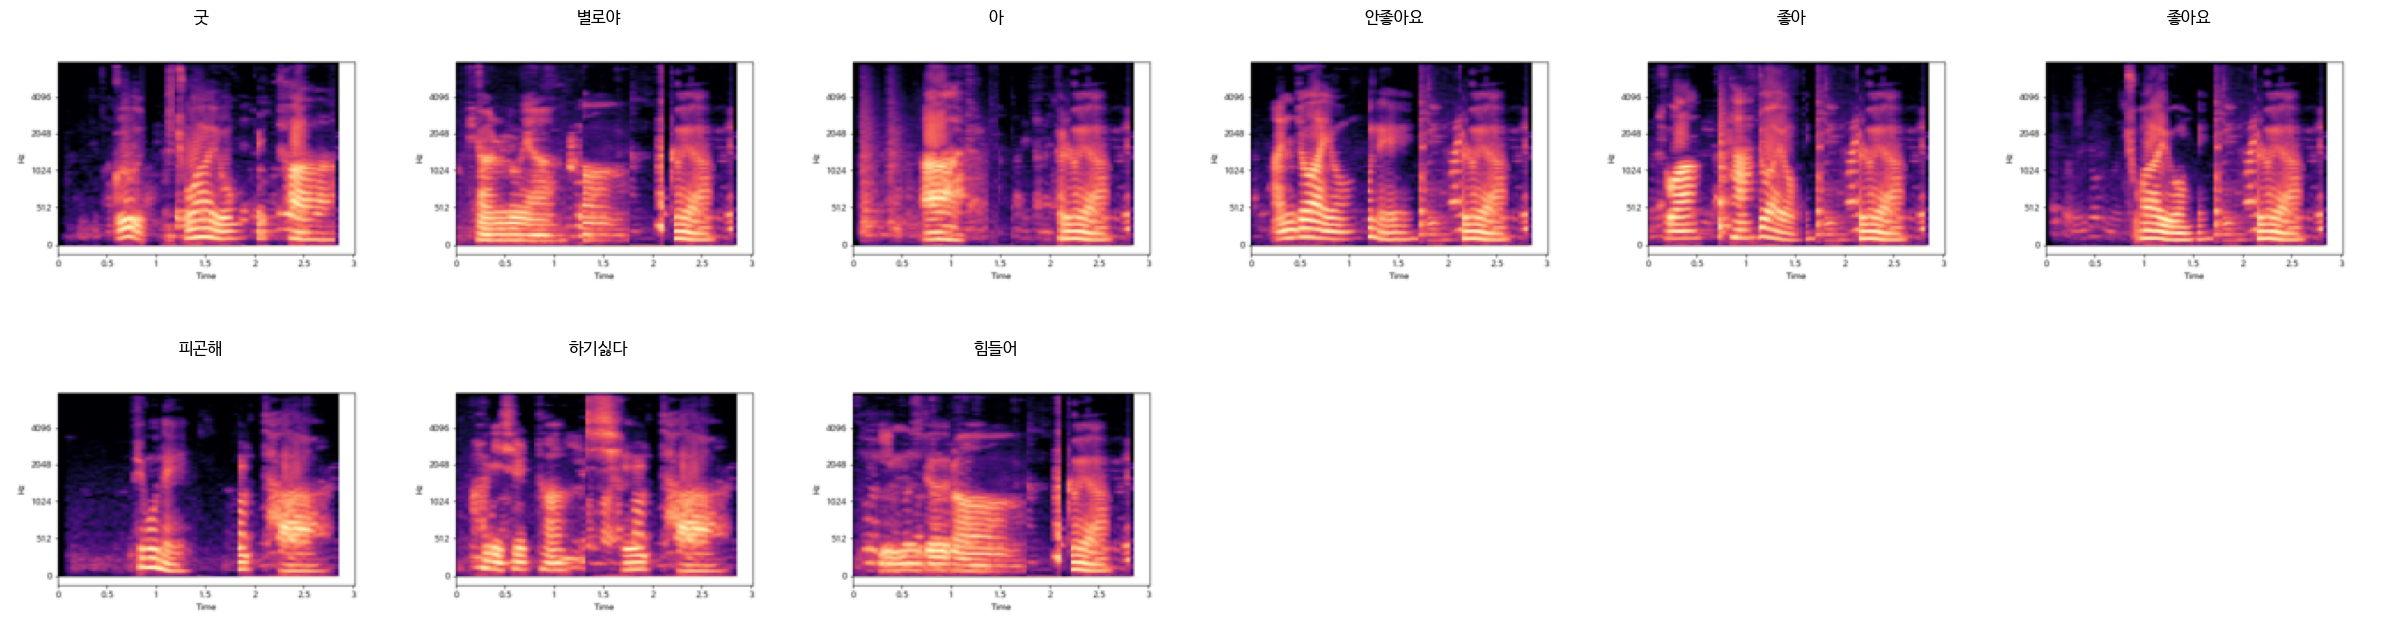

In [14]:
import matplotlib as mpl
mpl.rc('font', family="NanumBarunGothic")
draw_sample_pic_file_list(random_sample)

### train test로 데이터 분할

In [15]:
from sklearn.model_selection import train_test_split

train_data_condi, test_data = train_test_split(file_list_pd,
                                                test_size =0.3,
                                                stratify= file_list_pd['label'],
                                                random_state=13)

In [16]:
len(train_data_condi), len(test_data)

(126, 54)

### train validation으로 데이터 분할

In [17]:
train_data, val_data = train_test_split(train_data_condi,
                                                test_size =0.4,
                                                stratify= train_data_condi['label'],
                                                random_state=13)

In [18]:
len(train_data), len(val_data)

(75, 51)

In [19]:
train_data

,path,label,class
92,/home/s/Ai/nltk_s/data/plot/좋아_9.png,좋아,8
165,/home/s/Ai/nltk_s/data/plot/안좋아요_3.png,안좋아요,1
156,/home/s/Ai/nltk_s/data/plot/별로야_14.png,별로야,7
99,/home/s/Ai/nltk_s/data/plot/하기싫다_8.png,하기싫다,4
132,/home/s/Ai/nltk_s/data/plot/좋아요_17.png,좋아요,2
...,...,...,...
161,/home/s/Ai/nltk_s/data/plot/좋아_17.png,좋아,8
74,/home/s/Ai/nltk_s/data/plot/안좋아요_8.png,안좋아요,1
57,/home/s/Ai/nltk_s/data/plot/하기싫다_10.png,하기싫다,4
9,/home/s/Ai/nltk_s/data/plot/좋아요_4.png,좋아요,2


### 훈련용 데이터 현황

<AxesSubplot: >

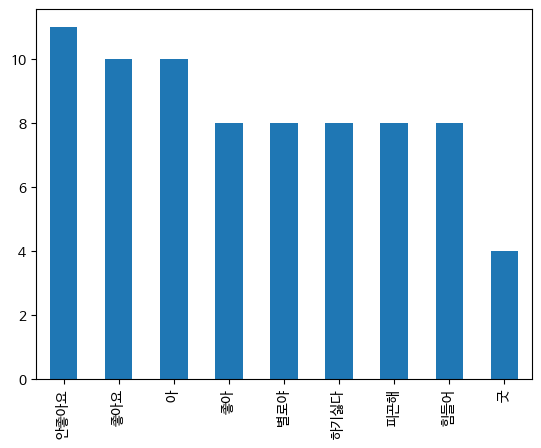

In [20]:
train_data['label'].value_counts().plot.bar()

### 검증용 데이터 현황

<AxesSubplot: >

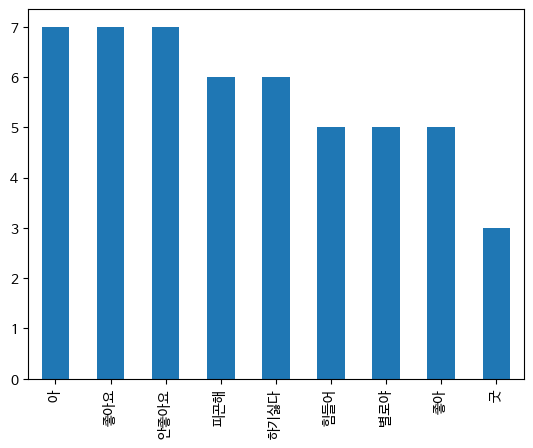

In [21]:
val_data['label'].value_counts().plot.bar()

### 테스트용 데이터 현황

<AxesSubplot: >

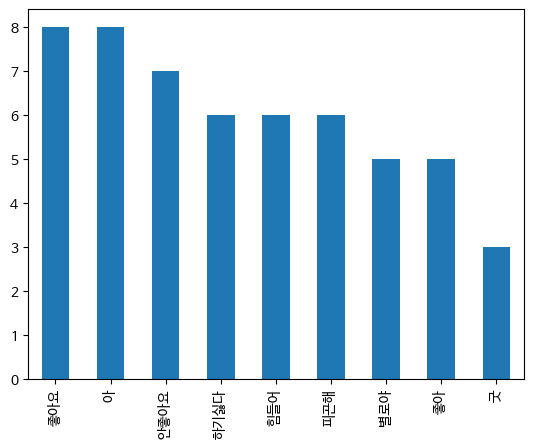

In [22]:
test_data['label'].value_counts().plot.bar()

### 이미지 크기확인

In [23]:
# Know image size
from PIL import Image

im = Image.open('/home/s/Ai/nltk_s/data/plot/아_1.png')
width, height = im.size
print(width, height)

216 144


### 훈련용 데이터

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255,
                                    horizontal_flip = True,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

train_generator = train_data_gen.flow_from_dataframe(
                    dataframe = train_data,
                    target_size = (216, 144),
                    class_mode = 'categorical',
                    x_col = 'path',
                    y_col = 'label'
)

Found 75 validated image filenames belonging to 9 classes.


### 검증용 데이터

In [25]:
val_data_gen = ImageDataGenerator(rescale=1./255)    

val_generator = val_data_gen.flow_from_dataframe(
                    dataframe = val_data,
                    class_mode = 'categorical',
                    x_col = 'path',
                    y_col = 'label',
                    target_size = (216, 144),
                    seed = 13,
                    shuffle = False
)

Found 51 validated image filenames belonging to 9 classes.


### 테스트용 데이터

In [26]:
test_data_gen = ImageDataGenerator(rescale=1./255)    

test_generator = test_data_gen.flow_from_dataframe(
                    dataframe = test_data,
                    class_mode = 'categorical',
                    x_col = 'path',
                    y_col = 'label',
                    target_size = (216, 144), #이미지 크기
                    seed = 13,
                    shuffle = False
)

Found 54 validated image filenames belonging to 9 classes.


In [27]:
len(file_list)

180

### CNN모델 구현

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras import layers, models

#CNN모델 구현
model = Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(216,144,3), padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(3,3), activation='relu', padding='same'),
    # layers.Conv2D(16,(1,1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64,(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(256,(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(len(wav_dict), activation='softmax')
])

model.summary()

2023-01-18 12:18:31.222848: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 216, 144, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 108, 72, 32)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 108, 72, 32)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 108, 72, 64)       18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 54, 36, 64)        0

### 컴파일

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 훈련시작

In [32]:
history = model.fit(train_generator, epochs=50, batch_size=8, validation_data=val_generator)

Epoch 1/50
3/3 [==============================] - 3s 737ms/step - loss: 2.8048 - accuracy: 0.0933 - val_loss: 2.1922 - val_accuracy: 0.1176
Epoch 2/50
3/3 [==============================] - 2s 808ms/step - loss: 2.2304 - accuracy: 0.1333 - val_loss: 2.1957 - val_accuracy: 0.1373
Epoch 3/50
3/3 [==============================] - 2s 610ms/step - loss: 2.2061 - accuracy: 0.0933 - val_loss: 2.1959 - val_accuracy: 0.1373
Epoch 4/50
3/3 [==============================] - 2s 654ms/step - loss: 2.1960 - accuracy: 0.1333 - val_loss: 2.1952 - val_accuracy: 0.1373
Epoch 5/50
3/3 [==============================] - 2s 652ms/step - loss: 2.1882 - accuracy: 0.1733 - val_loss: 2.1918 - val_accuracy: 0.1373
Epoch 6/50
3/3 [==============================] - 2s 553ms/step - loss: 2.1977 - accuracy: 0.0667 - val_loss: 2.1846 - val_accuracy: 0.1373
Epoch 7/50
3/3 [==============================] - 2s 527ms/step - loss: 2.1635 - accuracy: 0.1200 - val_loss: 2.1835 - val_accuracy: 0.1373
Epoch 8/50
3/3 [====

### 훈련결과

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_learning_history(history, targets, labels, axes_num):
    fig, ax = plt.subplots(1, 2, figsize = (12, 4))

    for i in range(4):
        sns.lineplot(x = range(len(history.history[targets[i]])),
            y = history.history[targets[i]], ax = ax[axes_num[i]], label = labels[i])

    ax[0].set_title('Loss')
    ax[1].set_title('Accuracy')
    sns.despine()
    plt.show()

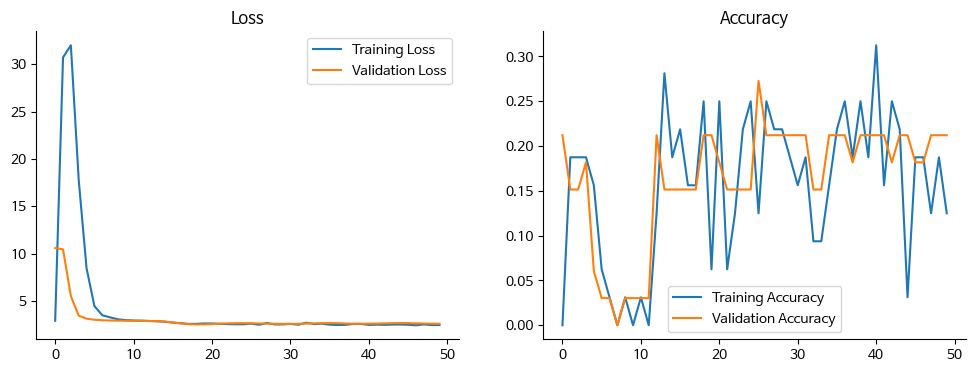

In [152]:
targets = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
labels = ['Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy']
axes_num = [0, 0, 1, 1]
draw_learning_history(history, targets, labels, axes_num)

### 테스트 데이터 성능

In [153]:
loss, accuracy = model.evaluate(test_generator)
print('Loss = {:.5f}', format(loss))
print('Accuracy = {:.5f}', format(accuracy))

1/1 [==============================] - 0s 332ms/step - loss: 2.6565 - accuracy: 0.1429
Loss = {:.5f} 2.656503915786743
Accuracy = {:.5f} 0.1428571492433548
